# CEG5204 Lab 3: Basic of deep learning for IMU data analytics
Lab 3 introduces you the self-collected sensor dataset with some useful preprocessing and visualization methods, and explores the deep neural networks.

## **Homework Requirements**


1.   Complete your project in the notebook ”CEG5205_Lab3.ipynb”;
2.   Implement your codes within ”TODO” and ”END OF YOUR CODE”, do NOT modify any codes outside the answer area;
3.   Make sure your codes clean, runnable and easily readable (add meaningful comments if needed);
4.   Write your answers in the given markdown cells, keep your answers clear and concise.


## **Submission** <font color=red> **(Deadline: Nov 15th, 11 PM)** </font>



*   Please submit a zip file to Canvas named as“HW_Lab3_YOUR STUDENT ID_YOUR NAME.zip”(e.g. “HW_Lab3_A1000000W_XXX XXX”), which includes:
*   The completed ”CEG5205_Lab3.ipynb” file,  which should be runnable without anyerrors;
*   Export a .pdf file named as “CEG5205_Lab3_ YOUR STUDENT ID_YOUR NAME.pdf”  ;
*   Put the figures you plot (if any) in the ” CEG5205_Lab3/figures” and  link them in the notebook correctly;
*   Do NOT upload any saved models, i.e., the checkpoint files.







**Lab3 is an individual project**, <font color=red> **do NOT share your solutions with others.**</font> **Plagiarism will be severely punished.**

## Loading packages
Please install the packages listed below if you haven't done so. To avoid unnecessary trouble while reproducing your code, please install the required packages version.

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

## Smart glove sensor dataset
The glove is equipped with three IMUs, and each gesture was recorded for approximately 3 seconds. The recorded data includes the linear acceleration and angular velocity in the XYZ directions, as well as the orientation in the XYZW dimensions. Moreover, the TFs between the index finger, middle finger, and palm have been captured.

## 1. Load and visualize IMU data (10 Points)
In task 1, the provided IMU data set have 810 samples with 45 channels you need to load all data first. (Note: each data sample don’t have same time length; the first column of data is the timestamps)


In [2]:
# Load the glove sensor data
# Please make sure the label_folder and data_folder are in the correct path
import pandas as pd

data_folder = "data"
label_folder = "label"

data_files = os.listdir(data_folder)
label_files = os.listdir(label_folder)
i=0

data_and_labels = {}
for data_file in data_files:
    if data_file.endswith(".csv"):
        data_path = os.path.join(data_folder, data_file)
        data_name = os.path.splitext(data_file)[0]
        sample_no = data_name.split("_data")[0]
        label_file = sample_no + "_label.csv"
        label_path = os.path.join(label_folder, label_file)

        if label_file in label_files:

            data = pd.read_csv(data_path)
            label = pd.read_csv(label_path)
            label = label.replace(10, 7)
            data_and_labels[i] = {"data": data, "label": label}
            i=i+1


## 1. Visualize IMU data (10 Points)
Select one hand gestures according to the reminder when your last digit of the student ID is divided by 7 to visualize the three IMUs data

<font color=red> (e.g., A0642316, 6 divided by 7 leaves a remainder of 6, selection “label 6: grasp”;
A1234568, 8 divided by 7 leaves a remainder of 1, “label 1: slide_up”). </font>

You need to plot 5 samples of selected hand gesture and provide a brief analysis for the generated signals of IMUs with different locations.


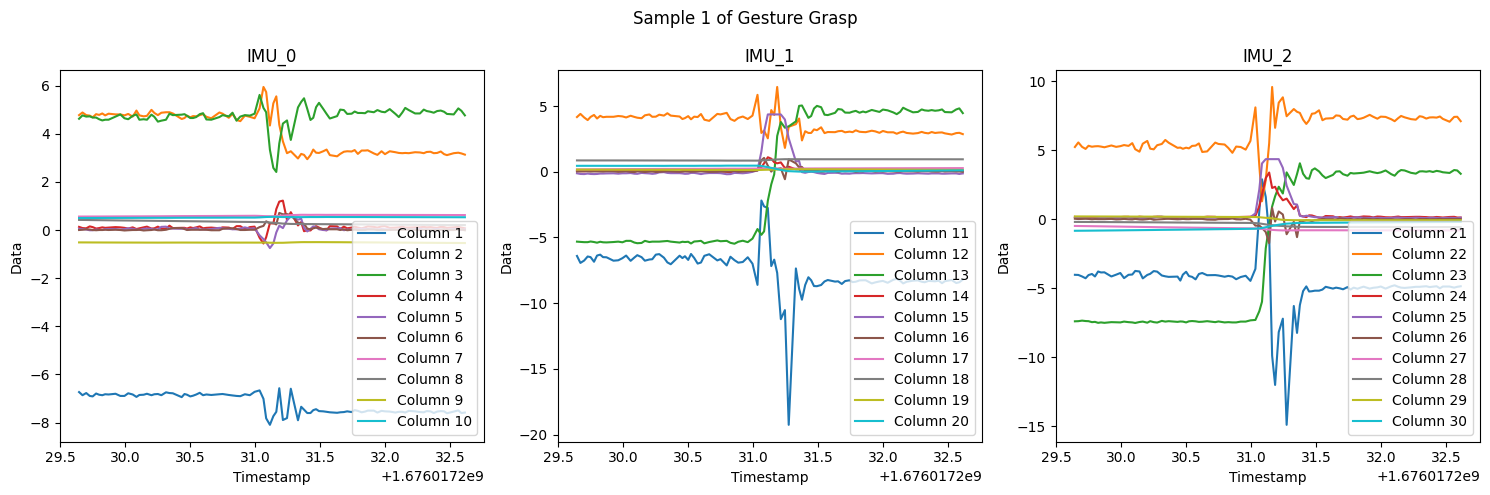

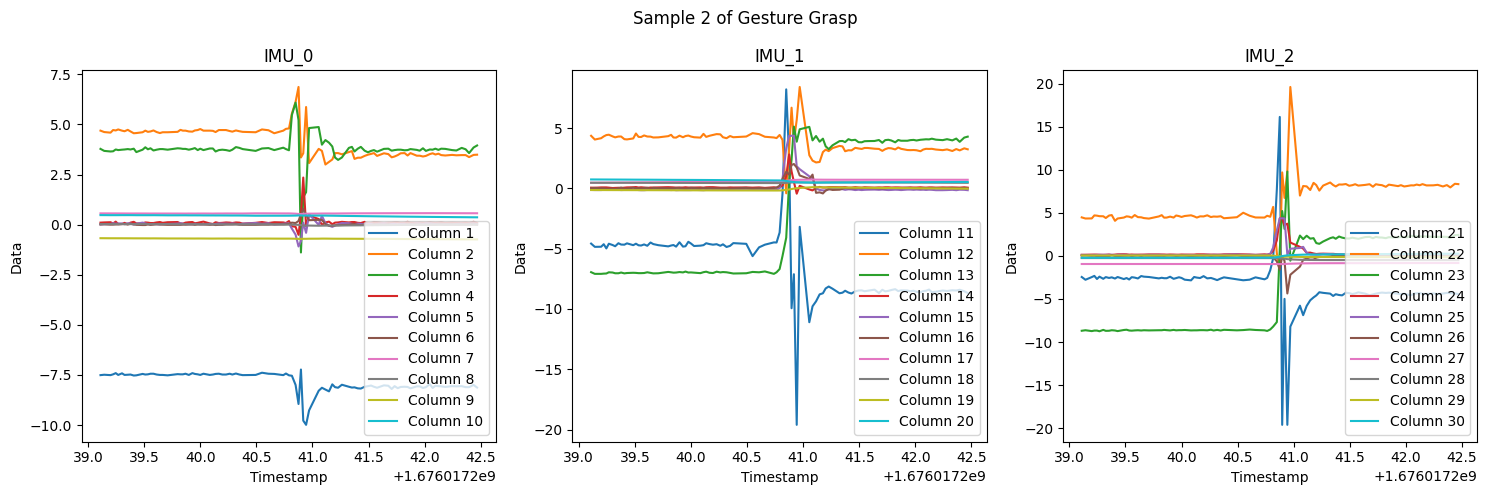

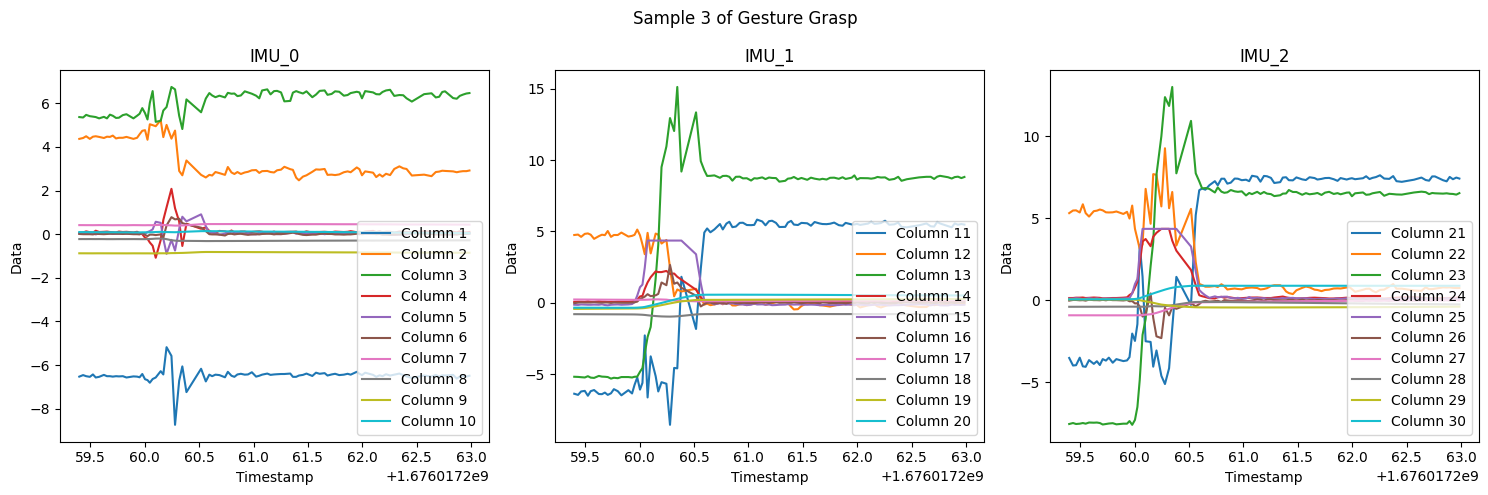

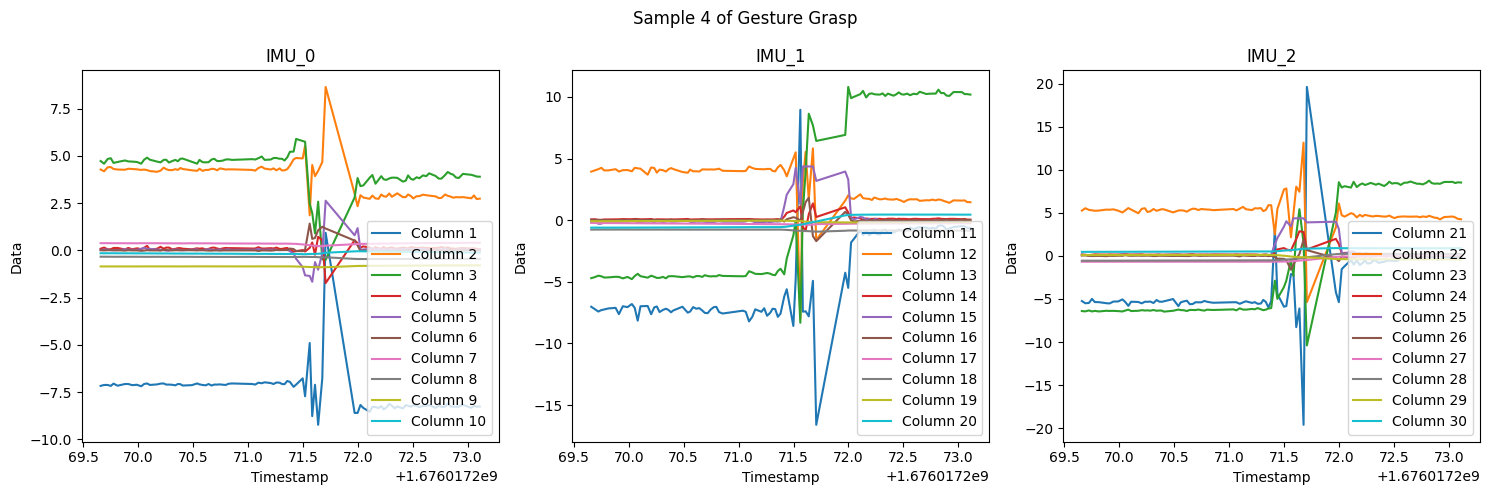

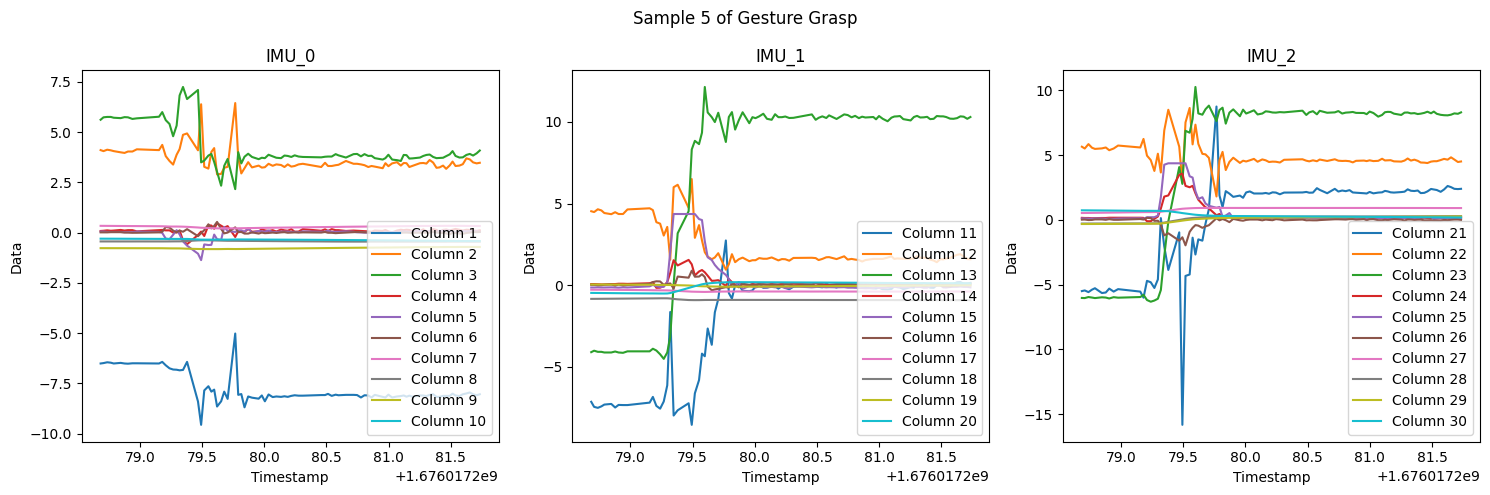

: 

In [3]:
######################################################################
# TODO:                                                              #
# Plot 5 samples of selected hand gesture                            #
# Hint:                                                              #
#     first-column data is timestamps; column 2-11 representIMU_0    #
#     column 12-21 represent IMU_1; column 22-31 represent IMU_2     #
######################################################################

# A0279576E -> 6
selected_gesture = 6 #grasp
g = 0
# Plotting 5 samples of the selected gesture
for s in range(5):
    # Get the data and label for the selected gesture
    while(data_and_labels[g]['label'].values != selected_gesture):
        g += 1    
    gesture_data = data_and_labels[g]['data']
    gesture_label = data_and_labels[g]['label']
    # print(data_and_labels[g]['label'].values)
    # print(g)
    g += 1
    samples = gesture_data.iloc[:, :]
    #print(gesture_data.iloc[0, 31:])

    # Plot IMU_0 data
    plt.figure(s, [15, 5])
    plt.subplot(1, 3, 1)
    for i in range(1, 11):
        plt.plot(samples.iloc[:, 0], samples.iloc[:, i])
    plt.title('IMU_0')
    plt.xlabel('Timestamp')
    plt.ylabel('Data')
    plt.legend(['Column {}'.format(i) for i in range(1, 11)], loc = 'lower right')

    # Plot IMU_1 data
    plt.subplot(1, 3, 2)
    for i in range(11, 21):
        plt.plot(samples.iloc[:, 0], samples.iloc[:, i])
    plt.title('IMU_1')
    plt.xlabel('Timestamp')
    plt.ylabel('Data')
    plt.legend(['Column {}'.format(i) for i in range(11, 21)], loc = 'lower right')

    # Plot IMU_2 data
    plt.subplot(1, 3, 3)
    for i in range(21, 31):
        plt.plot(samples.iloc[:, 0], samples.iloc[:, i])
    plt.title('IMU_2')
    plt.xlabel('Timestamp')
    plt.ylabel('Data')
    plt.legend(['Column {}'.format(i) for i in range(21, 31)], loc = 'lower right')

    plt.suptitle(f'Sample {s + 1} of Gesture Grasp')

    plt.tight_layout()
    plt.show()

######################################################################
#                       END OF YOUR CODE                             #
######################################################################

Please provide a brief analysis for the generated signals of IMUs with different locations

---


**Write your observations and analysis in this Markdown cell:**

For my ID A0279576E the last digit is 6, so the gesture is grasp. According to the 5 samples plot for gesture grasp, I have the following observations:

2.	For IMU_0, there are fluctuations in column 1, 2, 3, 4, 5, and 6, but the remaining remains unchanged, meaning the linear acceleration and the angular velocity of x, y, and z changed but orientation did not.

3.	For IMU_1, there are rises in column 11 and 13, mostly rise from negative to positive, meaning that the linear acceleration changes direction in x and z axis. There are sudden rise and rest in column 15, meaning the rise and fall of angular velocity of y. There are fluctuations in column 12, 14, and 16, meaning the linear acceleration of y and the angular velocity of x and z changed.

4.	For IMU_2, it is similar to IMU_1. There are rises in column 21 and 23, mostly rise from negative to positive, meaning that the linear acceleration changes direction in x and z axis. There are sudden rise and rest in column 25, meaning the rise and fall of angular velocity of y. There are fluctuations in column 22, 24, and 26, meaning the linear acceleration of y and the angular velocity of x and z changed.


---


## 2. Data processing (10 Points)
All characters are encoded in the representation of a one-hot vector, where only one unique bit of the vector is turned on for each unique character in the vocabulary.

You need to transfer the current label format into one-hot vector.

You also need to padding all data into the same data length.


In [4]:
######################################################################
# TODO:                                                              #
# Transfer the current label format into one-hot vector              #
# Hint:                                                              #
#     Feel free to use some packaghe                                 #
######################################################################

import torch

my_feature_list = []
my_label_list = []
num_samples = len(data_and_labels)    

for i in range(0, num_samples):
    tmp_data = data_and_labels[i]['data'].values[:, 1:]
    tmp_val = data_and_labels[i]['label'].values
    one_hot_label= np.zeros((8, 1))
    if(tmp_val == 10):
        one_hot_label[7] = 1
    else:
        one_hot_label[tmp_val] = 1

    my_feature_list.append(torch.tensor(tmp_data))
    my_label_list.append(torch.tensor(one_hot_label))

######################################################################
#                       END OF YOUR CODE                             #
######################################################################

In [5]:
######################################################################
# TODO:                                                              #
# Padding all data into the same data length                         #
# Hint:                                                              #
#     Recommended to use "zero padding" here                         #
######################################################################

from torch.nn.utils.rnn import pad_sequence

my_feature_list = pad_sequence(my_feature_list, batch_first=True, padding_value=0)

######################################################################
#                       END OF YOUR CODE                             #
######################################################################

## 3. Split dataset and build data loader (10 Points)
You will split the dataset into training and test sets (test_size=0.2) to avoid the overfitting.

You also need to build the data loader for batch training.



In [6]:
######################################################################
# TODO:                                                              #
# Split the dataset into training and test sets                      #
# build the data loader for batch training                           #
# Hint:                                                              #
#     Set test_size=0.2, batch size=32                               #
######################################################################

random_seed = 4
np.random.seed(random_seed)
torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(random_seed)

from torch.utils.data import Dataset, DataLoader

class My_data_Dataset(Dataset):
    def __init__(self, my_feature_list, my_label_list):
        super().__init__()
        self.my_feature_list = my_feature_list
        self.my_label_list = my_label_list
        
    def __getitem__(self, index):
        features = self.my_feature_list[index]
        label = self.my_label_list[index]
        return [features, label]
    
    def __len__(self):
        return len(self.my_feature_list)
    
batch_size=32 

test_num = int(num_samples * 0.2)
train_num = num_samples - test_num
print("test_num", test_num)
print("train_num", train_num)

dataset_train = My_data_Dataset(my_feature_list[0:test_num], my_label_list[0:test_num])
dataset_test= My_data_Dataset(my_feature_list[test_num:-1], my_label_list[test_num:-1])

def collate_fn(batch):
    features_list = []
    labels_list = []
    for features, labels in batch:
        features_list.append(features)
        labels_list.append(labels)
    return [torch.stack(features_list).float(), torch.stack(labels_list).squeeze()]

train_data_loader = DataLoader(dataset=dataset_train,
                               batch_size=batch_size,
                               shuffle=True,
                               pin_memory=True,
                               collate_fn = collate_fn,
                               num_workers=1)       

test_data_loader = DataLoader(dataset=dataset_test,
                               batch_size=batch_size,
                               shuffle=True,
                               pin_memory=True,
                               collate_fn = collate_fn,
                               num_workers=1 )

######################################################################
#                       END OF YOUR CODE                             #
######################################################################

test_num 162
train_num 648


## 4. Train LSTM for hand gestures (50 Points)
In this task, you are expected to build a Long-Short Term Memory (LSTM)  architecture for solving a problem of sequence signal and explore strategies that could further strengthen its performance.


### Loading packages

Please install the packages listed below if you haven't done so. To avoid unnecessary trouble while reproducing your code, please install the required [PyTorch](https://pytorch.org/) version.

In [7]:
import torch
import torch.nn.functional as F
import torch.optim as optim
# import torchvision
from torch.autograd import Variable

### Checking the Running Device

It is recommended to run this notebook on GPUs since that would be a much faster way to train and evaluate the model. If you have difficulties accessing GPUs with your machine, you can choose to use the free GPUs provided by [Google Colab](https://colab.research.google.com/).

In [8]:
if torch.cuda.is_available():
  device = 'cuda:7'
else:
  device = 'cpu'
print(device)

cuda:7


### Defining the Model
LSTMs are a type of recurrent neural network (RNN) architecture commonly used in various machine learning and natural language processing tasks.

While doing so, please follow the TODOs provided below. (Refer to [torch.nn](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html) for detailed instructions of building basic blocks with PyTorch.)

In [9]:


class LSTMModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        ##############################################################################
        # TODO: Define LSTM layers and FC layers.                                    #
        ##############################################################################
        
        # lstm layer
        self.lstm = torch.nn.LSTM(
            input_size = input_size,
            hidden_size = hidden_size,
            num_layers = num_layers,
            batch_first = True,
        )
        #FC out layer
        self.out = torch.nn.Linear(hidden_size, num_classes)

        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################
    
    def forward(self, x):
        ##############################################################################
        # TODO: Implement forward path turning an input data to class probability.   #
        # For activation function, please use ReLU.                                  #
        ##############################################################################
        
        # lstm layer
        # shape of lstm_out: (batch, time step, output size)
        lstm_out, (h_n, h_c) = self.lstm(x, None) # 0 for hidden state

        # activation
        # use the last output of lstm
        a_out = F.relu(lstm_out[:, -1, :])

        # FC
        out_logit = self.out(a_out)

        return out_logit

        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################


input_size = 44
hidden_size = 64
num_layers = 2
num_classes = 8

model = LSTMModel(input_size, hidden_size, num_layers, num_classes)
model.to(device)

print(model)

LSTMModel(
  (lstm): LSTM(44, 64, num_layers=2, batch_first=True)
  (out): Linear(in_features=64, out_features=8, bias=True)
)


### Training the Model

Some default settings for training.

In [10]:
# Hyperparameters
input_size = 44
hidden_size = 64
num_layers = 2
num_classes = 8

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1000

In [11]:
#####################################################################
# TODO:                                                             #
# Put all training data to train the build CNN model                #
# Hint: The input data size should be (N, Cin, L)                   #
#   where N is Batch size, Cin denotes a number of channel,         #
#   and L is a length of signal sequence                            #
#   The input label size should be (N, Classes)                     #
#####################################################################
random_seed = 4
np.random.seed(random_seed)
torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(random_seed)

model.train()
for epoch in range(num_epochs):
    batch_loss = []
    for batch_features, batch_label in train_data_loader:
        batch_features = batch_features.to(device)
        batch_label = batch_label.to(device)

        optimizer.zero_grad()

        res = model(batch_features)
        loss = criterion(res, batch_label)
        batch_loss.append(loss)
        loss.backward()
        optimizer.step()
    
    batch_loss = torch.mean(torch.stack(batch_loss)).item()
    print("epoch: {}, loss: {}".format(epoch, round(batch_loss, 5)))

# print("final epoch: {}, final_loss: {}".format(epoch, round(batch_loss, 5)))

#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################

# Save the trained model
torch.save(model.state_dict(), './model_lstm.pt')

epoch: 0, loss: 2.07072
epoch: 1, loss: 2.07232
epoch: 2, loss: 2.0651
epoch: 3, loss: 2.05861
epoch: 4, loss: 2.05562
epoch: 5, loss: 2.0697
epoch: 6, loss: 2.04103
epoch: 7, loss: 2.08243
epoch: 8, loss: 2.06572
epoch: 9, loss: 2.06584
epoch: 10, loss: 2.08744
epoch: 11, loss: 2.07522
epoch: 12, loss: 2.09148
epoch: 13, loss: 2.09306
epoch: 14, loss: 2.06623
epoch: 15, loss: 2.0805
epoch: 16, loss: 2.07316
epoch: 17, loss: 2.07195
epoch: 18, loss: 2.07663
epoch: 19, loss: 2.07496
epoch: 20, loss: 2.04638
epoch: 21, loss: 2.05696
epoch: 22, loss: 2.05734
epoch: 23, loss: 2.05901
epoch: 24, loss: 2.06102
epoch: 25, loss: 2.06851
epoch: 26, loss: 2.11156
epoch: 27, loss: 2.07644
epoch: 28, loss: 2.05845
epoch: 29, loss: 2.05501
epoch: 30, loss: 2.04962
epoch: 31, loss: 2.05343
epoch: 32, loss: 2.07272
epoch: 33, loss: 2.02616
epoch: 34, loss: 2.03955
epoch: 35, loss: 2.0153
epoch: 36, loss: 2.0303
epoch: 37, loss: 2.06694
epoch: 38, loss: 2.04808
epoch: 39, loss: 2.10161
epoch: 40, loss

### Evaluate the Model

Evaluate the performance of the trained LSTM model in test data set

In [12]:
assert os.path.exists('./model_lstm.pt'), 'train the model first'
# Load the trained model
model.load_state_dict(torch.load('./model_lstm.pt', map_location=torch.device('cpu')))
model.to(device)
model.eval()

#####################################################################
# TODO:  Print the predicted label of test set  (0-7)               #
# Put all test data to verify the preformance of trained LSTM model #
#####################################################################

from tqdm import tqdm
all_test_labels= []
all_test_predictions = []

model.eval()
with torch.no_grad():
    pbar = tqdm(test_data_loader)
    for batch_test_features, batch_test_label in pbar:
            batch_test_features = batch_test_features.to(device)
            batch_test_label = batch_test_label.to(device)

            test_res = model(batch_test_features)
            batch_predicted_label = torch.argmax(test_res, dim=1)
            all_test_predictions.append(batch_predicted_label)
            all_test_labels.append(torch.argmax(batch_test_label, dim=1))

all_test_predictions = torch.cat((all_test_predictions), dim=0).tolist()
all_test_labels = torch.cat((all_test_labels), dim=0).tolist()
print("the number of predicted labels :", len(all_test_predictions))
print("all predicted label of test set :", all_test_labels)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy = accuracy_score(all_test_labels, all_test_predictions)

precision = precision_score(all_test_labels, all_test_predictions, average="macro")
recall = recall_score(all_test_labels, all_test_predictions, average="macro")
f1 = f1_score(all_test_labels, all_test_predictions, average="macro")


print("accuracy (%): ", round(accuracy*100, 2))

print("precision (%):", round(precision*100, 2))
print("recall (%):", round(recall*100, 2))
print("f1 (%):", round(f1*100, 2))


#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################

100%|██████████| 21/21 [00:00<00:00, 102.36it/s]


the number of predicted labels : 647
all predicted label of test set : [3, 3, 3, 0, 0, 7, 6, 3, 5, 6, 2, 7, 1, 7, 0, 6, 4, 3, 2, 6, 1, 5, 0, 4, 4, 3, 4, 6, 1, 0, 7, 2, 7, 4, 0, 7, 0, 5, 2, 7, 3, 3, 6, 6, 1, 4, 7, 3, 0, 5, 3, 1, 7, 0, 3, 6, 7, 5, 2, 2, 0, 6, 6, 0, 2, 7, 7, 0, 6, 6, 5, 4, 7, 2, 4, 4, 6, 4, 1, 3, 7, 5, 3, 2, 3, 6, 2, 2, 0, 3, 3, 0, 5, 6, 3, 0, 7, 0, 6, 4, 2, 5, 6, 0, 3, 7, 0, 7, 4, 5, 0, 3, 0, 0, 6, 5, 2, 3, 1, 4, 6, 0, 3, 1, 7, 4, 0, 1, 6, 7, 2, 5, 6, 1, 7, 6, 0, 3, 6, 4, 6, 2, 4, 3, 3, 3, 2, 2, 5, 4, 0, 4, 3, 7, 0, 1, 2, 6, 4, 3, 5, 2, 4, 7, 1, 0, 7, 7, 5, 5, 6, 0, 0, 4, 4, 1, 0, 0, 3, 5, 1, 0, 2, 1, 5, 0, 6, 7, 4, 4, 7, 1, 7, 6, 4, 0, 7, 2, 3, 5, 5, 4, 3, 6, 0, 7, 5, 1, 4, 2, 1, 5, 6, 1, 0, 4, 2, 2, 1, 1, 5, 2, 3, 6, 0, 5, 1, 1, 1, 4, 0, 4, 0, 1, 7, 4, 3, 6, 2, 2, 5, 2, 7, 1, 7, 1, 4, 3, 2, 5, 1, 7, 0, 5, 7, 4, 0, 4, 0, 7, 5, 1, 4, 5, 7, 2, 7, 3, 5, 6, 5, 1, 5, 7, 0, 1, 7, 5, 0, 3, 3, 2, 5, 3, 4, 2, 7, 7, 2, 2, 2, 4, 2, 7, 7, 6, 3, 0, 5, 5, 1, 2, 6, 3, 1, 1, 1, 4, 6, 1

### 5. Refining the Model (20 Points)

Although the previous model has achieved fair classification results, the test error is still remaining room for further improvement. There are lots of methods to refine your model, such as **modifying the network architecture** (e.g., making your network deeper), **optimizing 

the learning strategy** (e.g., optimizer, loss function), and **tuning the hyperparameters** (e.g., learning rate, training iterations), etc. Please try <font color=red> at least **TWO** </font>different methods to improve your model's performance, and discuss why these changes can work. Design and conduct your own experiments using the coding cell below, and present your experimental results and analysis in a decent way (e.g., drawing some neat figures/tables can help to convey your thoughts effectively).

In [13]:
# Refination :  bigger hidden state ; with dropout to avoid over fitting  ; tuning hypterparameter

random_seed = 4
np.random.seed(random_seed)
torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(random_seed)
    
class Refination_1_LSTMModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(Refination_1_LSTMModel, self).__init__()
        
        # lstm layer
        self.lstm = torch.nn.LSTM(
            input_size = input_size,
            hidden_size = hidden_size,
            num_layers = num_layers,
            batch_first = True,
        )

        self.dropout = torch.nn.Dropout(p=0.1)

        #FC out layer
        # self.out_1 = torch.nn.Linear(hidden_size, int(hidden_size/2) )
        # self.out = torch.nn.Linear(int(hidden_size/2) , num_classes)

        self.out = torch.nn.Linear(hidden_size , num_classes)

    def forward(self, x):
        
        # lstm layer
        # shape of lstm_out: (batch, time step, output size)
        lstm_out, (h_n, h_c) = self.lstm(x, None) # 0 for hidden state

        # activation
        # use the last output of lstm
        a_out = F.relu(lstm_out[:, -1, :])

        a_out = self.dropout(a_out)

        # FC
        # a_out = F.relu(self.out_1(a_out))
        out_logit = self.out(a_out)

        return out_logit

input_size = 44
# hidden_size = 64
hidden_size = 96
num_layers = 2
num_classes = 8

refination_model_1 = Refination_1_LSTMModel(input_size, hidden_size, num_layers, num_classes)
refination_model_1.to(device)
print(refination_model_1)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(refination_model_1.parameters(), lr=0.001)

num_epochs = 1100

refination_model_1.train()
for epoch in range(num_epochs):
    for batch_features, batch_label in train_data_loader:
        batch_features = batch_features.to(device)
        batch_label = batch_label.to(device)

        optimizer.zero_grad()

        res = refination_model_1(batch_features)
        loss = criterion(res, batch_label)
        print("epoch: {}, loss: {}".format(epoch, round(loss.item(), 5)))
        loss.backward()
        optimizer.step()

# Save the trained model
torch.save(refination_model_1.state_dict(), './refination_model_1.pt')

assert os.path.exists('./refination_model_1.pt'), 'train the model first'
# Load the trained model
refination_model_1.load_state_dict(torch.load('./refination_model_1.pt', map_location=torch.device('cpu')))
refination_model_1.to(device)
refination_model_1.eval()

from tqdm import tqdm
all_test_labels= []
all_test_predictions = []

refination_model_1.eval()
with torch.no_grad():
    pbar = tqdm(test_data_loader)
    for batch_test_features, batch_test_label in pbar:
            batch_test_features = batch_test_features.to(device)
            batch_test_label = batch_test_label.to(device)

            test_res = refination_model_1(batch_test_features)
            batch_predicted_label = torch.argmax(test_res, dim=1)
            all_test_predictions.append(batch_predicted_label)
            all_test_labels.append(torch.argmax(batch_test_label, dim=1))

all_test_predictions = torch.cat((all_test_predictions), dim=0).tolist()
all_test_labels = torch.cat((all_test_labels), dim=0).tolist()
print("the number of predicted labels :", len(all_test_predictions))
print("all predicted label of test set :", all_test_labels)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy = accuracy_score(all_test_labels, all_test_predictions)

precision = precision_score(all_test_labels, all_test_predictions, average="macro")
recall = recall_score(all_test_labels, all_test_predictions, average="macro")
f1 = f1_score(all_test_labels, all_test_predictions, average="macro")

print("accuracy (%): ", round(accuracy*100, 2))

print("precision (%):", round(precision*100, 2))
print("recall (%):", round(recall*100, 2))
print("f1 (%):", round(f1*100, 2))


Refination_1_LSTMModel(
  (lstm): LSTM(44, 96, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (out): Linear(in_features=96, out_features=8, bias=True)
)
epoch: 0, loss: 2.09015
epoch: 0, loss: 2.08405
epoch: 0, loss: 2.08415
epoch: 0, loss: 2.07713
epoch: 0, loss: 2.08611
epoch: 0, loss: 2.03931
epoch: 1, loss: 2.08447
epoch: 1, loss: 2.07433
epoch: 1, loss: 2.07771
epoch: 1, loss: 2.08093
epoch: 1, loss: 2.07883
epoch: 1, loss: 2.11771
epoch: 2, loss: 2.07798
epoch: 2, loss: 2.08039
epoch: 2, loss: 2.07847
epoch: 2, loss: 2.07982
epoch: 2, loss: 2.07627
epoch: 2, loss: 2.11017
epoch: 3, loss: 2.07956
epoch: 3, loss: 2.07733
epoch: 3, loss: 2.08626
epoch: 3, loss: 2.06835
epoch: 3, loss: 2.08069
epoch: 3, loss: 2.02758
epoch: 4, loss: 2.08541
epoch: 4, loss: 2.07314
epoch: 4, loss: 2.0771
epoch: 4, loss: 2.07335
epoch: 4, loss: 2.06892
epoch: 4, loss: 2.1392
epoch: 5, loss: 2.08454
epoch: 5, loss: 2.0746
epoch: 5, loss: 2.08411
epoch: 5, loss: 2.06868
epoc

100%|██████████| 21/21 [00:00<00:00, 75.11it/s]

the number of predicted labels : 647
all predicted label of test set : [4, 4, 1, 7, 4, 6, 5, 6, 1, 6, 7, 3, 7, 2, 2, 4, 6, 3, 5, 1, 3, 0, 1, 0, 7, 4, 4, 0, 2, 7, 4, 3, 7, 2, 5, 6, 2, 4, 4, 2, 1, 2, 5, 2, 3, 6, 4, 2, 6, 4, 6, 6, 3, 2, 6, 0, 4, 6, 0, 1, 2, 5, 6, 1, 7, 0, 4, 4, 1, 4, 2, 7, 1, 1, 6, 3, 5, 0, 5, 2, 7, 2, 7, 4, 0, 1, 7, 2, 7, 3, 1, 3, 7, 0, 4, 1, 4, 3, 2, 3, 5, 7, 1, 5, 3, 6, 5, 3, 7, 1, 1, 2, 3, 6, 4, 6, 4, 7, 1, 0, 0, 0, 1, 3, 3, 1, 3, 6, 5, 0, 5, 2, 2, 0, 5, 7, 7, 2, 6, 3, 1, 0, 2, 1, 6, 0, 1, 2, 4, 4, 4, 7, 6, 7, 4, 6, 0, 2, 6, 4, 0, 7, 2, 2, 5, 5, 4, 3, 5, 0, 0, 5, 5, 5, 0, 0, 2, 5, 5, 0, 4, 7, 5, 2, 0, 1, 1, 4, 0, 4, 5, 7, 5, 1, 1, 5, 3, 0, 1, 4, 4, 3, 4, 6, 7, 1, 5, 4, 4, 2, 6, 3, 7, 2, 7, 4, 7, 7, 0, 0, 5, 1, 1, 6, 3, 0, 2, 2, 0, 2, 1, 7, 1, 3, 0, 2, 1, 3, 4, 6, 0, 0, 5, 6, 5, 2, 6, 4, 5, 2, 4, 0, 4, 2, 4, 0, 3, 7, 0, 1, 4, 3, 0, 5, 1, 0, 2, 1, 3, 6, 0, 5, 7, 6, 1, 5, 3, 6, 7, 1, 4, 6, 0, 4, 7, 2, 7, 2, 0, 2, 3, 6, 2, 1, 0, 5, 1, 1, 5, 1, 0, 0, 1, 5, 3, 5, 1, 6, 3, 3

---


**Write your observations and analysis in this Markdown cell:**

Three methods are used to refine the model: bigger hidden state (hidden_size = 96), with dropout to avoid over fitting (torch.nn.Dropout(p=0.1)), tuning hyper parameters. After all the effort, the performance improved to get accuracy 88.87%, precision 89.24%, recall 89.14%, and f1 88.99%.

The amount of data is small, and blindly increasing the network structure, e.g., deepening the number of layers, can lead to overfitting, making the effect drop dramatically. So I added dropout to prevent overfitting, and then and appropriately adjusted the dimension size of some hidden layers. By observing the lost, I adjusted the tuning parameters appropriately. With LSTM model it is not stable, and then if you do not set the total number of random numbers, and then the results of each experiment will be a big gap.

---

### *6. Explore other structures (additional 10 Points)*

*In addition to LSTM, you can also use other structures based on RNN to explore if such structures can give you a better performance *


---


**Write your observations and analysis in this Markdown cell:**

GRU_Model(

  (gru): GRU(44, 128, num_layers=2, batch_first=True)

  (dropout): Dropout(p=0.5, inplace=False)

  (out): Linear(in_features=128, out_features=8, bias=True)

)

GRU is used to improve performance. accuracy 91.96%, precision 92.55%, recall 92.27%, f1 91.97%.

Because of the observation that the amount of data is small, and LSTM is particularly easy to overfitting, then my idea is to reduce the parameters of the network, so I chose to replace LSTM with GRU, which has a simpler network structure, and the experimental results found that the replacement of GRU resulted in high performance and stable training.

---




In [14]:
# use GRU instead of LSTM

import torch.nn.init as init
from torch.optim import lr_scheduler

random_seed = 4
np.random.seed(random_seed)
torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(random_seed)

class GRU_Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(GRU_Model, self).__init__()
        
        # lstm layer
        self.gru = torch.nn.GRU(
            input_size = input_size,
            hidden_size = hidden_size,
            num_layers = num_layers,
            batch_first = True,
        )

        for name, param in self.gru.named_parameters():
            if 'weight' in name:
                init.xavier_normal_(param.data)  # 你可以选择其他初始化方法

        self.dropout = torch.nn.Dropout(p=0.5)

        #FC out layer
        # self.out_1 = torch.nn.Linear(hidden_size, int(hidden_size/2) )
        # self.out = torch.nn.Linear(int(hidden_size/2) , num_classes)

        self.out = torch.nn.Linear(hidden_size , num_classes)

    def forward(self, x):
        
        # lstm layer
        # shape of lstm_out: (batch, time step, output size)
        lstm_out, (h_n, h_c) = self.gru(x, None) # 0 for hidden state

        # activation
        # use the last output of lstm
        a_out = F.relu(lstm_out[:, -1, :])

        a_out = self.dropout(a_out)

        # FC
        # a_out = F.relu(self.out_1(a_out))
        out_logit = self.out(a_out)

        return out_logit

input_size = 44
# hidden_size = 64
hidden_size = 128
num_layers = 2
num_classes = 8
lr = 0.003
num_epochs = 1000

gru_model = GRU_Model(input_size, hidden_size, num_layers, num_classes)
gru_model.to(device)
print(gru_model)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(gru_model.parameters(), lr=lr)

step_size = 300  
gamma = 0.7    
scheduler = lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)

gru_model.train()
for epoch in range(num_epochs):
    scheduler.step()

    for batch_features, batch_label in train_data_loader:
        batch_features = batch_features.to(device)
        batch_label = batch_label.to(device)

        optimizer.zero_grad()

        res = gru_model(batch_features)
        loss = criterion(res, batch_label)
        print("epoch: {}, loss: {}".format(epoch, round(loss.item(), 5)))

        loss.backward()
        optimizer.step()

# Save the trained model
torch.save(gru_model.state_dict(), './gru_model.pt')

assert os.path.exists('./gru_model.pt'), 'train the model first'
# Load the trained model
gru_model.load_state_dict(torch.load('./gru_model.pt', map_location=torch.device('cpu')))
gru_model.to(device)
gru_model.eval()

from tqdm import tqdm
all_test_labels= []
all_test_predictions = []

gru_model.eval()
with torch.no_grad():
    pbar = tqdm(test_data_loader)
    for batch_test_features, batch_test_label in pbar:
            batch_test_features = batch_test_features.to(device)
            batch_test_label = batch_test_label.to(device)

            test_res = gru_model(batch_test_features)
            batch_predicted_label = torch.argmax(test_res, dim=1)
            all_test_predictions.append(batch_predicted_label)
            all_test_labels.append(torch.argmax(batch_test_label, dim=1))

all_test_predictions = torch.cat((all_test_predictions), dim=0).tolist()
all_test_labels = torch.cat((all_test_labels), dim=0).tolist()
print("the number of predicted labels :", len(all_test_predictions))
print("all predicted label of test set :", all_test_labels)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy = accuracy_score(all_test_labels, all_test_predictions)

precision = precision_score(all_test_labels, all_test_predictions, average="macro")
recall = recall_score(all_test_labels, all_test_predictions, average="macro")
f1 = f1_score(all_test_labels, all_test_predictions, average="macro")

print("accuracy (%): ", round(accuracy*100, 2))

print("precision (%):", round(precision*100, 2))
print("recall (%):", round(recall*100, 2))
print("f1 (%):", round(f1*100, 2))


GRU_Model(
  (gru): GRU(44, 128, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (out): Linear(in_features=128, out_features=8, bias=True)
)


/raid/hpc/hekai/miniconda3/envs/LLM/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


epoch: 0, loss: 2.10238
epoch: 0, loss: 2.08312
epoch: 0, loss: 2.09433
epoch: 0, loss: 2.09925
epoch: 0, loss: 2.0874
epoch: 0, loss: 2.13818
epoch: 1, loss: 2.06078
epoch: 1, loss: 2.08137
epoch: 1, loss: 2.0771
epoch: 1, loss: 2.09522
epoch: 1, loss: 2.09233
epoch: 1, loss: 2.02496
epoch: 2, loss: 2.11206
epoch: 2, loss: 2.09285
epoch: 2, loss: 2.09782
epoch: 2, loss: 2.04796
epoch: 2, loss: 2.04869
epoch: 2, loss: 1.93157
epoch: 3, loss: 2.03175
epoch: 3, loss: 2.11413
epoch: 3, loss: 2.09517
epoch: 3, loss: 2.04581
epoch: 3, loss: 2.10039
epoch: 3, loss: 2.07815
epoch: 4, loss: 2.06742
epoch: 4, loss: 2.0242
epoch: 4, loss: 2.06981
epoch: 4, loss: 1.97777
epoch: 4, loss: 2.09593
epoch: 4, loss: 2.17195
epoch: 5, loss: 2.0967
epoch: 5, loss: 2.05863
epoch: 5, loss: 2.09879
epoch: 5, loss: 2.02514
epoch: 5, loss: 2.06366
epoch: 5, loss: 2.15385
epoch: 6, loss: 2.05448
epoch: 6, loss: 2.08871
epoch: 6, loss: 2.05108
epoch: 6, loss: 2.06492
epoch: 6, loss: 2.11223
epoch: 6, loss: 1.99

100%|██████████| 21/21 [00:00<00:00, 100.67it/s]

the number of predicted labels : 647
all predicted label of test set : [1, 3, 5, 0, 2, 3, 1, 4, 0, 6, 2, 3, 6, 4, 2, 5, 7, 2, 6, 6, 5, 5, 5, 3, 4, 4, 5, 3, 2, 7, 2, 4, 3, 0, 7, 3, 1, 1, 6, 0, 0, 4, 4, 5, 3, 0, 0, 5, 3, 6, 6, 1, 1, 7, 4, 1, 5, 5, 2, 1, 0, 4, 2, 0, 6, 4, 0, 0, 6, 4, 6, 7, 3, 0, 7, 1, 3, 4, 7, 0, 0, 2, 1, 1, 2, 5, 1, 5, 3, 7, 1, 0, 1, 2, 2, 5, 7, 3, 5, 6, 4, 7, 6, 3, 2, 4, 5, 4, 3, 7, 4, 0, 2, 5, 7, 4, 2, 7, 6, 0, 7, 2, 1, 4, 2, 1, 6, 5, 1, 2, 6, 6, 5, 2, 4, 7, 5, 7, 0, 3, 1, 6, 0, 1, 0, 1, 7, 2, 5, 6, 6, 1, 5, 6, 7, 4, 3, 3, 3, 7, 1, 6, 6, 2, 3, 6, 5, 1, 4, 2, 7, 5, 5, 7, 2, 4, 7, 4, 6, 5, 0, 5, 4, 5, 1, 3, 5, 6, 3, 0, 7, 1, 7, 7, 1, 1, 7, 6, 5, 2, 5, 5, 0, 7, 6, 6, 2, 3, 7, 2, 7, 7, 2, 1, 6, 6, 4, 3, 5, 3, 1, 0, 6, 2, 2, 7, 2, 0, 4, 5, 0, 4, 7, 6, 4, 7, 3, 2, 7, 6, 3, 6, 2, 0, 6, 4, 5, 4, 5, 3, 5, 6, 3, 4, 3, 3, 7, 2, 0, 7, 1, 3, 3, 0, 2, 3, 2, 4, 3, 3, 3, 1, 6, 1, 3, 3, 4, 2, 4, 7, 4, 4, 0, 6, 5, 1, 7, 6, 0, 7, 5, 7, 0, 1, 7, 5, 7, 7, 5, 2, 6, 1, 7, 7, 4, 1, 7, 7, 3, 3